Jonathan Tang
<br>Perceptron and Neural Network

# Problem 1.

**(20 points)** An online rental video company is interested in creating a model to make movie recommendations to one of its customers, Ms. X. As a consultant to this company, you are provided with the history of the movies that she accepted or rejected to watch. She makes her selections solely based on the movie’s level of violence and critic ratings. The data is in **movieData.csv** on Canvas.


## 1.

Train a perceptron that will create a linear boundary decision that will help the company to make future recommendations to Ms. X. After how many iterations does the algorithm converge?

In [ ]:
set.seed(42)

In [ ]:
movieData <- read.csv("https://drive.google.com/uc?export=download&id=1QDFhbgfIRShRcGMozvm8bfJlubUxYA5e")
head(movieData)

,LevelOfViolence,CriticsRating,Watched
,<int>,<dbl>,<int>
1,1,1.2,-1
2,1,3.5,1
3,1,4.2,1
4,2,3.9,1
5,2,2.8,-1
6,3,3.0,-1


$$h(\vec{X}) = sign(\vec{X}\vec{w})$$
$$new \space \vec{X} = old \space \vec{X} + y_n\vec{X}_n$$

In [ ]:
# Define variables
w <- matrix(c(rnorm(3)))
X <- as.matrix(cbind(rep(1, nrow(movieData)), movieData[1:2]))
y <- as.matrix(movieData[3])

In [ ]:
# Define the perceptron learning algorithm function, which takes w, X, and y
PLA <- function(w, X, y) {

  h_x <- sign(X%*%w)
  index <- which(h_x != y)[1]   # check for first mismatched value between h_x & y

  iterations <- 0

  while (!is.na(index)) {   # while not NA, meaning until there are no more mismatches
    iterations <- iterations + 1
    w <- w + y[index,] * X[index,]

    h_x <- sign(X%*%w)
    index <- which(h_x != y)[1]
  }

  results <- list(w, iterations)
  return(results)
}

In [ ]:
# Run the function using the variables we stated earlier
results <- PLA(w, X, y)

w <- results[[1]]
iterations <- results[[2]]

Let's view our $w$ variable, which contains our weights.

In [ ]:
w

-25.629042
-4.564698
9.963128


We can also see how many iterations the PLA model took to form the decision boundary.

In [ ]:
paste('# of iterations to converge:', iterations)

[1] "# of iterations to converge: 111"

## 2.

Upon creating a model, plot the boundary line along with all the data
points and axes clearly marked.

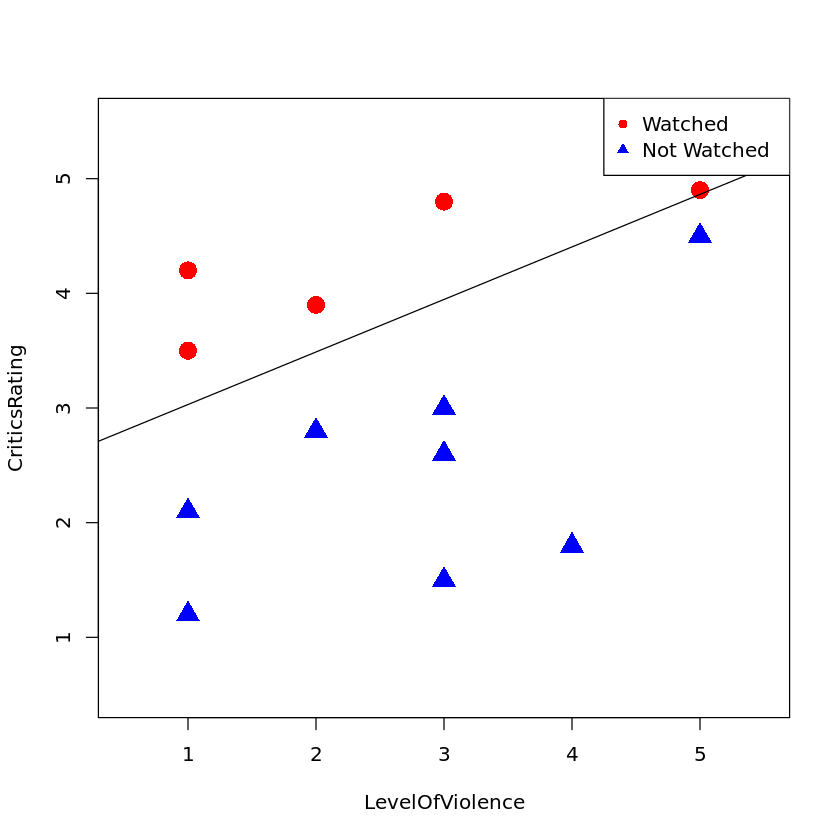

In [ ]:
# Set y-int and slope for graph
y_int <- -(w[1]/w[3])
slope <- -(w[2]/w[3])

# Set color and symbols of points
symbols <- ifelse(movieData$Watched == 1, 16, 17)
colors <- ifelse(movieData$Watched == 1, "red", "blue")

# Plot the dataset & decision boundary
plot(movieData$LevelOfViolence, movieData$CriticsRating, pch = symbols, col = colors, cex = 2, xlim = c(0.5, 5.5), ylim = c(0.5, 5.5), xlab = 'LevelOfViolence', ylab = 'CriticsRating')
abline(a = y_int, b = slope)
legend("topright", legend = c("Watched", "Not Watched"), pch = c(16, 17), col = c("red", "blue"))

# Problem 2.

**(40 points)** In this problem you will use the data in **siCoData.csv** file to train a neural network. Use the backpropagation algorithm to train a 3-layer (input, hidden, output) neural network. Use stochastic gradient decent (SGD) technique and assume that the activation function for the hidden layer and output layer are tanh and linear, respectively. (You must write your own code for BP and SGD).

## 1.

The stopping criteria for training in this problem should be a combination of achieving a minimum in-sample error

$$E_{in}=\frac{1}{N}\sum_{n=1}^{N}e_n$$

and reaching a maximum number of epochs (In this expression $N$ is the number of observations in the data set and en is the error corresponding to each individual training point). Report the minimum $E_{in}$ that you could achieve along with the related weights and number of iterations.


In [ ]:
data <- read.csv("https://drive.google.com/uc?export=download&id=1QCekKTY1f-ABJRDp0HfiW5UrEGGPcBhS")
head(data)

,x,y
,<dbl>,<dbl>
1,-0.88923759,-0.3347130
2,0.53253865,0.8981562
3,0.59653968,0.8706666
4,-0.37534901,-0.7138749
5,0.08346516,0.4011146
6,0.52220413,1.0193927


In [ ]:
# Define input and target vectors. Append column of 1s to X for bias.
X <- cbind(rep(1, nrow(data)), data$x)
Y <- matrix(data$y)

# Define weight vectors. W1 is 2x2 and W2 is 3x1.
W1 <- matrix(c(rnorm(4)), nrow = 2)
W2 <- matrix(c(rnorm(3)), nrow = 3)

learning_rate <- 0.1
epochs <- 0
max_epochs <- 1000
results <- c()
Ein <- 1

while ((epochs < max_epochs) & (Ein > 0.035)) {
  epochs <- epochs + 1
  total_error <- 0

  # Sample/shuffle training points
  row_list <- sample(1:nrow(data), nrow(data), replace = FALSE)

  for (row in row_list) {

    # Sample training point randomly
    row <- sample(1:nrow(data), 1)

    # Forward pass: tanh() for S1, linear for S2 (y/output)
    tanh_S1 <- cbind(1, tanh(X[row, ] %*% W1))
    S2 <- tanh_S1 %*% W2

    # Record error for this training point
    error <- drop((S2 - Y[row, ])^2)
    # Add the error for this training point to the total error of the epoch
    total_error <- total_error + error

    # Backpropogation / Gradient Descent
    dW2 <- t(tanh_S1) %*% (2 * (S2 - Y[row, ]))
    dW1 <- matrix(X[row, ]) %*% ((1 - tanh_S1^2) * ((2 * (S2 - Y[row, ])) %*% t(W2)))[, -1]

    W2 <- W2 - (learning_rate * dW2)
    W1 <- W1 - (learning_rate * dW1)
  }
  
  # Calculate Ein with 1/N*en for this epoch, record the results in a matrix.
  Ein <- total_error / nrow(data)
  results <- rbind(results, c(epochs, Ein, W1, W2))
}

# Report # of epochs, E_in, and weights in a dataframe. Round to 4 digits.
results <- data.frame(results)
colnames(results) <- c('Epoch', 'E_in', 'W1[1]', 'W1[2]', 'W1[3]', 'W1[4]', 'W2[1]', 'W2[2]', 'W2[3]')
results <- round(results, 4)

Below is a dataframe showing the results of each **epoch**, $E_{in}$, $w_1$, and $w_2$.

In [ ]:
head(results, 5)

,Epoch,E_in,W1[1],W1[2],W1[3],W1[4],W2[1],W2[2],W2[3]
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.2548,-1.0221,0.2139,0.0167,-1.9454,0.4148,0.6491,-0.9313
2,2,0.1116,-0.9422,-0.1614,-0.1323,-2.6841,0.3798,0.5808,-1.0089
3,3,0.0908,-0.6476,-0.6082,-0.1601,-3.1057,0.3892,0.7546,-0.9597
4,4,0.0642,-0.5573,-0.9031,-0.1159,-3.3966,0.3683,0.9768,-1.3649
5,5,0.0523,-0.3763,-0.9369,-0.0504,-3.5124,0.3516,1.1443,-1.4162


Display the **epoch** with the lowest $E_{in}$. Show the weights $w_1$ and $w_2$.

epoch, $E_{in}$

In [ ]:
results

In [ ]:
min_row <- which.min(results$E_in)
results[min_row,1:2]

,Epoch,E_in
,<dbl>,<dbl>
88,88,0.0344


$w_1$

In [ ]:
W1 <- matrix(c(results[min_row,3], results[min_row,4], results[min_row,5], results[min_row,6]), nrow = 2)
W1

0.3067,0.1342
-1.0336,-3.4038


$w_2$

In [ ]:
W2 <- matrix(c(results[min_row,7], results[min_row,8], results[min_row,9]), nrow = 3)
W2

-0.2913
1.4757
-1.6567


## 2.

Graph the original data (y vs. x) and the predicted values (ŷ vs. x) on two separate scatter plots.

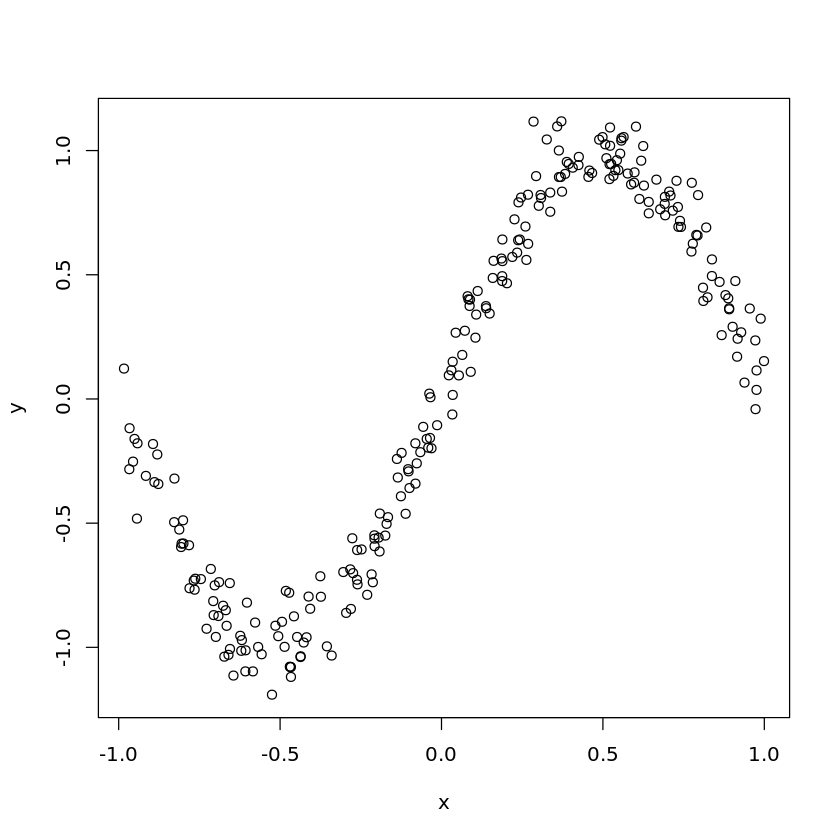

In [ ]:
# Original data
plot(data)

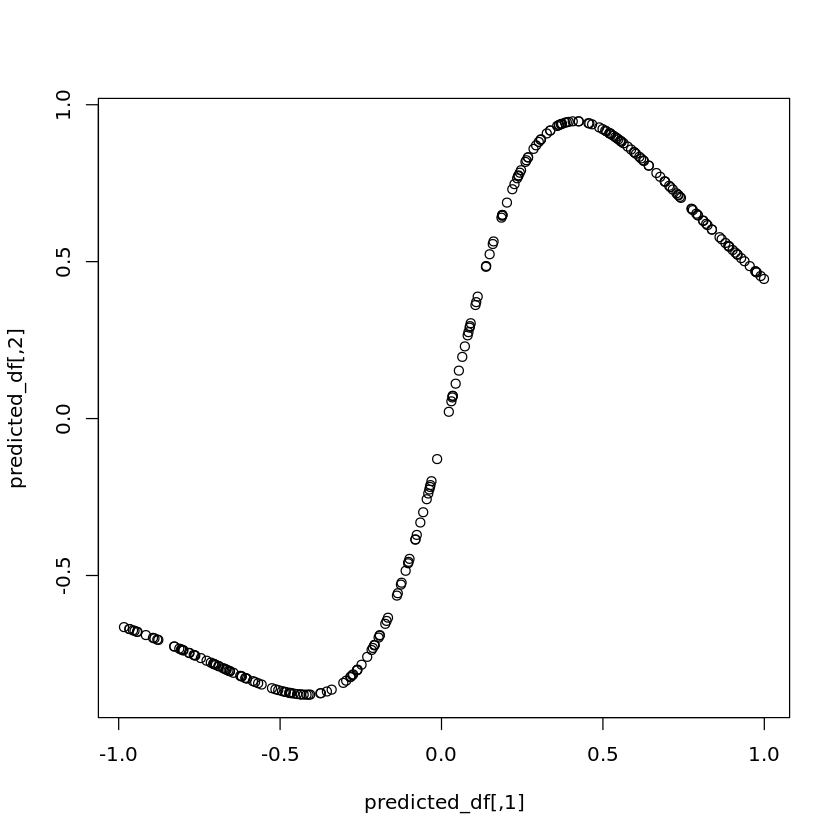

In [ ]:
# Predicted data
predicted <- cbind(1, tanh(X %*% W1)) %*% W2
predicted_df <- cbind(data[,1], predicted)
plot(predicted_df)

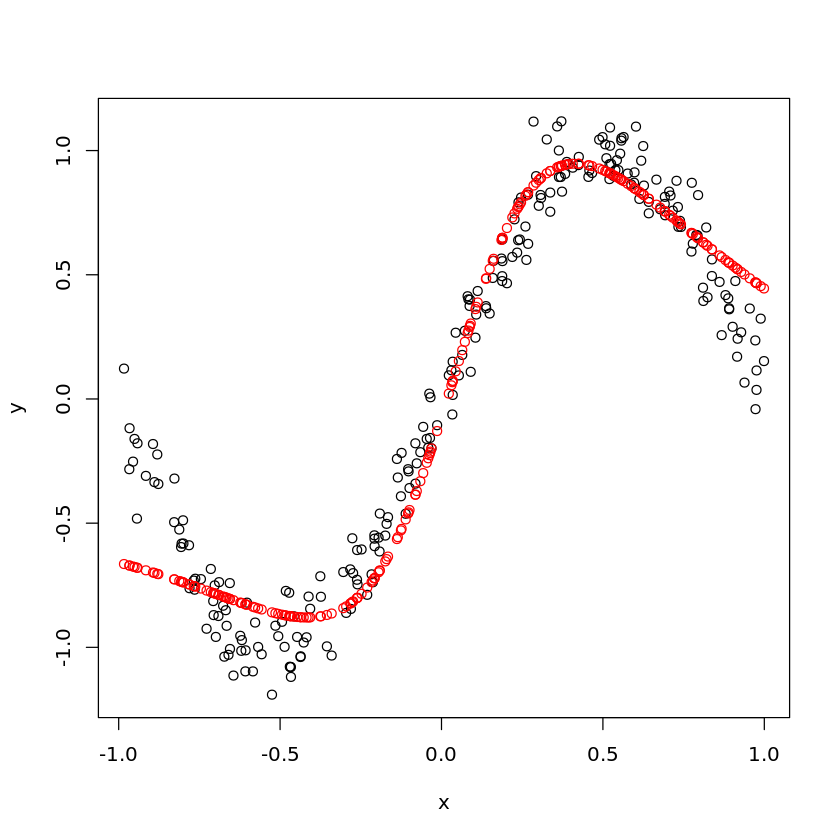

In [ ]:
# Overlapped
plot(data)
points(predicted_df, col = "red")